#### Weihao Li

# MTH9879 Homework 9

Assigned: April 25, 2017.
Due: May 9, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


### 1. (20 points)
Following Almgren and Chriss,  assume that the stock price $S_t$ evolves as

$$
dS_t = \sigma\,dZ_t
$$

and the price $\tilde S_t$ at which we transact is given by

$$
\tilde S_t = S_t - \eta\,v_t
$$

where $v_t:=-{\dot x}_t$ is the rate of trading with $x_0 = X$ and $x_T = 0$.

In the lecture notes, we showed that with a risk term that penalizes average VaR instead of variance, the risk-adjusted cost of trading associated with a given price path $\{S_t\}$ is given by

$$
C = \int_0^T\,(S_t - \eta\,v_t) \,dx_t + \lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

for some price of risk $\lambda$. We want to find a (possibly state-dependent) control $v_t$ that minimizes the expected cost $\cC=\E[C]$.

(a) Apply the technique of integration by parts to simplify the term $\int_0^T S_t dx_t$. Does the optimal strategy depend on the stock price $S_t$?  Why not?  Write down the HJB equation for the resulting problem.

(b) Solve the first order condition to find the optimal trading rate $v^\star$.    

(c) Substitute $v^\star$ back into the HJB equation to show that the value function $\cC$ must satisfy
$$
\cC_t = \frac{\cC_x^2}{4\,\eta\,} - \lambda \sigma x.
$$

(d) With the terminal condition, 

$$\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

solve the HJB equaiton with the ansatz $\cC(t,x) = \eta\,\left[a(t)\,x^2 + b(t)\,x + c(t)\right]$. Verify that the optimal trading rate is given by

$$
v^\star = \frac{x}{T-t} - \frac{1}{4}\, \kappa \, (T-t)
$$

with 

$$
\kappa = \frac{\lambda\,\sigma}{\eta}.
$$

(e) Define the characteristic time $T^\star$ as

$$
T^\star=\sqrt{\frac{4\,X}{\kappa}}=\sqrt{\frac{4\,\eta\,X}{\lambda\,\sigma}}.
$$


Verify that the optimal trading strategy with liquidation horizon set to the characteristic time $T^\star$ is given by

$$
\begin{eqnarray*}
x_t&=&X\,\left(1-\frac{t}{T}\right)^2.
\end{eqnarray*}
$$


#### Solution (a):
* By assumption  $dS_t = \sigma\,dZ_t$, we can deduce $S_T - S_0 = \sigma\,Z_T$, and from the model, we have $v_t = v_t\,d t$
\begin{align}
C &= \int_0^T\,(S_0 + \sigma\,Z_t - \eta\,v_t) \,dx_t + \lambda\,\sigma\,\int_0^T\,x_t\,dt\\
  &= S_0(x_T - x_o) + \sigma(Z_T\,x_T - Z_0-x_0 -\int_0^T\,x_t dZ_t )  + \int_0^T\, \eta\,v_t^2 \,dt + \lambda\,\sigma\,\int_0^T\,x_t\,dt\\
  &= -S_0\,X - \sigma\int_0^Tx_t dZ_t  + \int_0^T\,(\eta\,v_t^2 +\lambda\,\sigma\, x_t\ )\,dt
\end{align}
By comparing with the first equation, we got:
$$
\int_0^T\,S_t dx_t= -S_0\,X - \sigma\int_0^Tx_t dZ_t 
$$
So what we are trying to minimize is 
$$E(C) = -S_T X +E( \int_0^T\,(\eta\,v_t^2 +\lambda\,\sigma\, x_t\ )\,dt)$$
The expectation term we are trying to minimize, as we can see, is not depended on $S_T$
And the value function reads:
$$
    J(t,\, x) = \min_{v_t\in\mathcal G_{[t, T]}} \left\{\int_t^T(\lambda \sigma x_t + \eta v_t^2) dt \right\}
$$
And the HJB will give us :
$$
    \frac{\partial J}{\partial t} + \lambda \sigma x + \min_{v\in \mathcal G}\left\{ \eta v^2 - vJ_x \right\} = 0
$$

(b) 
We want to have $$\min_{v\in \mathcal G}\left\{ \eta v^2 - vJ_x \right\}$$ 
Taking derivitive with respect to v, we have $$2\eta\,v - J_x = 0$$
$$v^\star =\frac{J_x}{2\eta} $$


(c)
Plug $$v^\star =\frac{J_x}{2\eta} $$ into HJB

$$J_t  - \frac{1}{4\eta}J_x^2= - \lambda \sigma\,x$$
In optimization, we have $C_t = J_t$ and $C_x = J_x$
$$
C_t = \frac{1}{4\eta}C_x^2 - \lambda \sigma\,x
$$

(d)
* 
 First,let's make a guess :$$\cC(t,x) = \eta\,(a(t)\,x^2 + b(t)\,x + c(t))$$. 
 Thus,by calculating 
 $C_t$ and $C_x$, rearranging terms from last question, we get:
$$
    \eta(a(t)'-a(t)^2)x^2 + (\eta b(t)'-\eta a(t)b(t)+\lambda \sigma)x = \frac{b(t)^2\eta}{4} - \eta c(t)'
$$
* we now compare term by term: 
* (1) quandratic term:
\begin{align}
\eta(a(t)'-a(t)^2)x^2 &= 0\\
(a(t)'-a(t)^2)&= 0\\
a(t)   &= \frac{1}{M - t}
\end{align}
M is a constant
* (2) linear term:
\begin{align}
    \eta b(t)' - \eta ab + \lambda\sigma &= 0 \\
    \eta b(t)' - \frac{\eta}{M-t}b+\lambda\sigma &= 0\\
\end{align}




Then the second equation becomes
   $$ \eta b(t)' - \frac{\eta}{M-t}b(t)+\lambda\sigma = 0,$$
solve it, we have:$$b(t) = \frac{H}{M-t} + \frac{\lambda\sigma}{2\eta}(M-t)$$
where $H$ is a constant.

Testing with limit condition, we found that $M = T$
Thus
\begin{align}
    a(t) &= \frac{1}{T-t} \\
    b(t) &= \frac{H}{T-t} + \frac{\lambda\sigma}{2\eta}(T-t)
\end{align}

* (3) Solving constant term:
$$
\frac{b(t)^2}{4} = c(t)'
$$

* Since $c(T) = 0$, we have $ U = 0$ and $H = 0$,We will have:



$$
    c(t) =  -\frac{\lambda^2\sigma^2}{48\eta^2}(T-t)^3
$$

Finally
$$
    \cC = \eta[\frac{1}{T-t}x^2 + \frac{\lambda\sigma}{2\eta}(T-t) x - \frac{\lambda^2\sigma^2}{48\eta^2}(T-t)^3]
$$

So
$$
    v^\star = \frac{\cC_x}{2\eta}  = \frac{x}{T-t} + \frac{1}{4}\, \kappa \, (T-t)
$$
and $\kappa = \frac{\lambda\,\sigma}{\eta}$.
(The equation in question is Wrong)


(e)
Use equation in (d)
$$
    v^\star = \frac{x}{T-t} + \frac{1}{4}\, \kappa \, (T-t)
$$
$$
    -\frac{dx}{dt}  = \frac{x}{T-t} + \frac{1}{4}\, \kappa \, (T-t)
$$

As condition provided $x_0 = X$,  $C = \frac{X}{T}$, We have
$$
    x_t = \left(\frac{X}{T} - \frac{1}{4}\kappa t\right)(T-t)
$$

With $T^\star=\sqrt{\frac{4\,X}{\kappa}}$, we will have

$$
    x_t  = X(1-\frac{t}{T})^2
$$

## ABM and GBM

### Download MSFT data

In [1]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
library(repr)
options(repr.plot.height=5)

### 2. (8 points)

Recall from the lecture slides that with time-averaged VaR as the risk penalty, and when the liquidation time $T$ is chosen to be the characteristic time, the optimal trading rate under ABM becomes

$$
v^A(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\left(1-\frac t T\right)
$$

and the optimal trading rate under GBM becomes

$$
v^G(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\frac{S_t}{S_0}\,\left(1-\frac t T\right).
$$

(a) The *msft.bats* dataset from *MSFT130311.rData* contains all trades on the BATS exchange on 11-Mar-2013.  One trading days has 390 minutes.  Sample the  *msft.bats* dataset evenly, roughly every minute of volume time.  Superimpose plots of the optimal strategy under ABM and GBM assuming liquidation takes place over one trading day.

(b) Denote the corresponding position sizes by $x^A(t)$ and $x^G(t)$ respectively.  What is the maximum deviation of the two position sizes as a percentage of the initial position $X$?  How significant is this deviation?



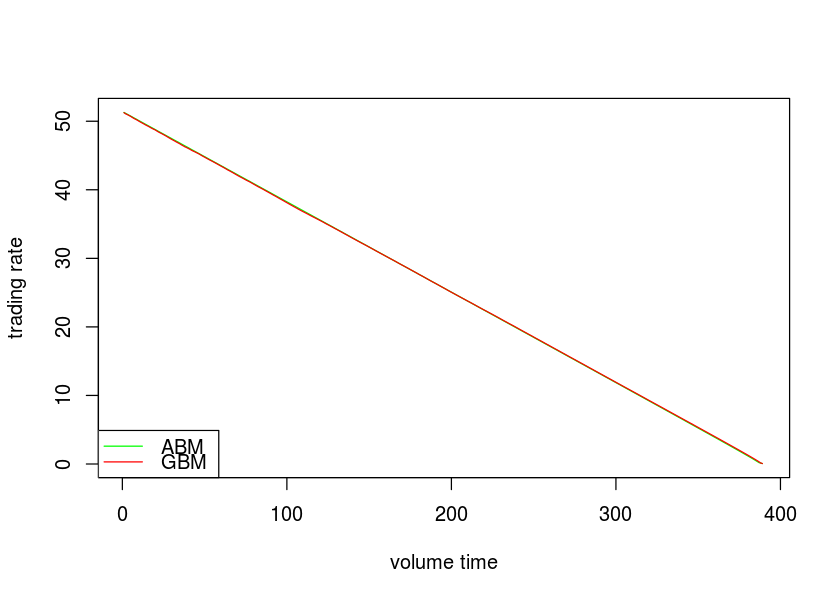

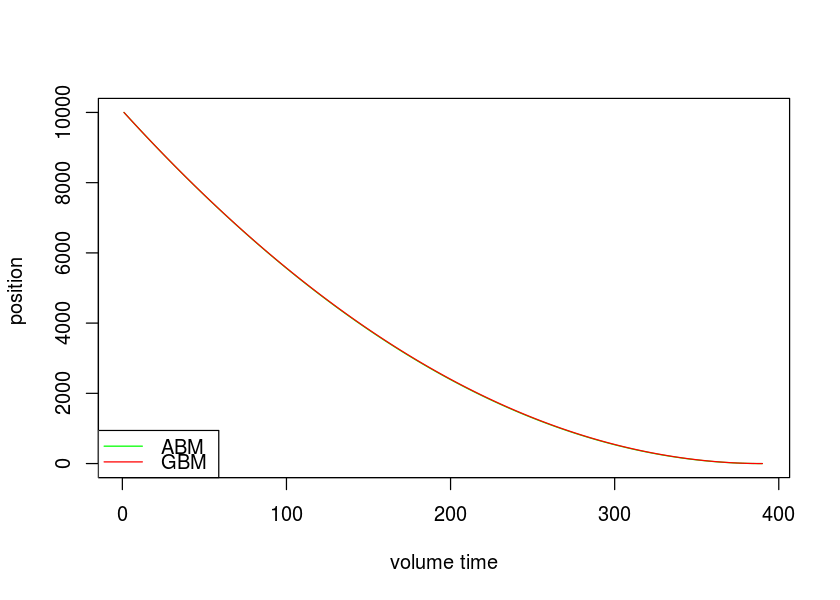

In [3]:
# Solution to (a)
# initialized
T<-390
X<-10000
msft <-msft130311.bats
msft[,1] <- cumsum(abs(msft[,1]))
total_vol <-  msft[nrow(msft),1]
d_vol <-(msft[nrow(msft),1]/390)



# find the price series S_t, the first entry is S_0
S_t <- c(1:T)
for(i in 1:T) {
  S_t[i] <- head(msft[msft[,1]>=d_vol*i,2],1)

}








#ABM positions 

xt_A <- c(1:T)
xt_A[1] <- X_c<-X
vt_A <- c(1:T)

#GBM
xt_G <- c(1:T)
xt_G[1] <- X_c<-X
vt_G <- c(1:T)

# calculate trading rate and position
for(t in 1:T){
    vt_A[t] = abs(xt_A[t])/(T - t) + X / T * (1 - t/T)
    xt_A[t+1] = max(xt_A[t] - vt_A[t], 0)
    
    vt_G[t] = abs(xt_G[t])/(T-t)+(X*S_t[t])/(T*msft[1,2])*(1-t/T)
    xt_G[t+1] = max(xt_G[t] - vt_G[t], 0)
  
}

#plot
plot(1:T,vt_A,xlab="volume time",ylab="trading rate", col="green", type="l")
lines(1:T,vt_G,col="red", type="l")
legend("bottomleft",pch=-1,lty=1,col=c("green","red"),legend=c("ABM","GBM"))
plot(1:391,xt_A,xlab="volume time",ylab="position ", col="green", type="l")
lines(1:391,xt_G,col="red", type="l")
legend("bottomleft",pch=-1,lty=1,col=c("green","red"),legend=c("ABM","GBM"))

In [4]:
cat(xt_A[55],xt_G[55])
max(na.omit((abs(xt_A-xt_G)))/X)

7419.18 7423.704

[1] 0.001235201

In [5]:
cat("It is 0.12352% percent of the inital position. So it is not significant")

It is 0.12352% percent of the inital position. So it is not significant

## Kratz and Schöneborn with time-averaged VaR risk charge

### 3. (12 points)

(a) Repeat the computation of the optimal strategy from the lecture notes with time-averaged VaR

$$
\lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

as the risk term (rather than the quadratic variation $\lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt$).  Show that the optimal position

$$
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)
$$
and deduce the optimal trading rate $v^\star(t)$.

(b) By Taylor-expanding the solution around $\theta=0$, show that we retrieve the solution derived in the slides with no dark pool

$$
x^\star(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right) .
$$

in the limit $\theta \to 0$.


#### Solution (a)
By given, we have the expected cost
$$
C(t) = \eta \mathbb{E}[ \int_t^T\,\dot x_u^2 + \kappa x_u\,du ]
$$
with $\kappa := \frac{\lambda\sigma} { \eta}$
* So the HJB is:
$$
C_t + \eta\kappa x_t + \min_{v,y \in \mathcal{G}} \{ -vC_x +\eta v^2 + \theta [C(x_t-y_t)-C(x_t)] \} = 0
$$
* Similarly in the first question,we get
$$
    v^\star = \frac{\cC_x}{2\eta}
$$
* Now we have HJB as:
$$
    \frac{\partial \cC}{\partial t} + \lambda\sigma x -\frac{\cC_x^2}{4\eta} - \theta\cC = 0
$$
* Again, make a guess:$\cC(t,x) = a(t)\,x^2 + b(t)\,x + c(t)$
* Solve the quandratic term:
\begin{align}
    a(t)' - \frac{a(t)^2}{\eta} - \theta a(t) &= 0 \\
                             a(t) &= -\frac{\theta\eta}{2} (1-\mbox{coth}(\frac{\theta}{2}(T-t)))\\
\end{align}


* Solve the linear term:
\begin{align}
    b(t)' - (\frac{a(t)}{\eta}+\theta) b(t) + \lambda\sigma &= 0 \\
    b(t) &= \frac{2A\eta}{\theta} + A\eta (T-t) (1-\mbox{coth}(\frac{\theta}{2}(T-t))), \\
\end{align}

Plug back in,

$$
= \frac{1}{2\eta}[ -2\frac{\theta\eta}{2} (1-\mbox{coth}(\frac{\theta}{2}(T-t)))\cdot x + \frac{2A\eta}{\theta} + A\eta (T-t) (1-\mbox{coth}(\frac{\theta}{2}(T-t))) ]
$$

Thus
$$
    v^\star= -\frac{dx}{dt}= \frac{\theta}{e^{\theta(T-t)}-1} x + \frac{1}{2\eta}[\frac{\lambda\sigma(t-T)}{e^{\theta(T-t)}-1} + \frac{\lambda\sigma}{\theta}]
$$

$$
x^\star(t)=(X-\frac{A\, T}{\theta })\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)
$$
With $A = \frac{\lambda\sigma}{2\eta}$


### Soluton (b)

\begin{align}
x^\star (t)&= (X-\frac{A\, T}{\theta })\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)\\&= X \frac{1-e^{-\theta(T-t)}}{1-e^{-\theta T}} - A (\frac{T-t}{\theta} - \frac{T(1-e^{-\theta(T-t)})}{\theta(1-e^{-\theta T})})
\end{align}
Taking limit:
\begin{align}
\lim_{\theta \to 0}A (\frac{T-t}{\theta} - \frac{T(1-e^{-\theta(T-t)})}{\theta(1-e^{-\theta T})})&=\lim_{\theta \to 0} A\,( \frac{T\,(-(T-t)e^{-\theta(T-t)}+Te^{-\theta T}) - t(Te^{-\theta T})}{1-e^{-\theta T}+\theta T (e^{-\theta T})})\\
&=\lim_{\theta \to 0} A\,( \frac{T\,((T-t)^2e^{-\theta(T-t)}-T^2e^{-\theta T}) + t T^2 e^{-\theta T}}{2Te^{-\theta T}-\theta T^2 e^{-\theta T}}) \\
&=  A\, (\frac{t^2-tT}{2}) (L'Hôpital)\\
&= \frac{At}{2} (t-T)\\
\end{align}
Finally
$$
x^\star(t)=(X-\frac{A \, T}{2}\,t)\,(1-\frac{t}{T}) .
$$